Set up all installs and git clones. Must run cell twice.






In [ ]:
#@title Install Libraries
!pip install einops
!pip install fitlog
!pip install tsfresh
!pip install umap--learn
!pip install ipydatetime
!pip install dash
!pip install jupyter_dash
!git clone https://github.com/tylerblynn/selfsense

# ** TRISTAN MERGE **
# for dash video player component 
!pip install dash-player
# for uploading video to google drive
!pip install -U kora
!pip install dash-bootstrap-components
!pip install dash-bootstrap-templates
# **

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 3.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 937.6/937.6 KB 35.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.8 MB/s eta 0:00:00
  Created wheel for fitlog: filename=fitlog-0.9.15-py3-none-any.whl size=969379 sha256=fda79876b637152dbbae42f55858307362a56279af177f451d2daf5c2f5d9993
  Stored in directory: /root/.cache/pip/wheels/59/70/f8/71b05f850635073a1029909b9965181a389037aa6475ee68c6
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=df066a26f46788507de9aeae945e4f8b851c404ca90a47a728

In [ ]:
#@title Imports
import pandas as pd
import os
import io
import sys
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
import ipydatetime
import IPython
import math
import csv
from keras.models import load_model
import numpy as np
from IPython.display import display
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from ipywidgets import FileUpload
import datetime
import time
from datetime import datetime
import random
import umap.umap_ as umap
import ipywidgets as widgets
import json
import matplotlib.pyplot as plt
import seaborn as sns
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash import ctx
from sklearn.preprocessing import LabelEncoder
from google.colab import files
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ** TRISTAN CHANGES ** 

# videoplayer
import dash_player
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
# GRAPH LAYER
from plotly.subplots import make_subplots
from google.colab import output
output.enable_custom_widget_manager()

import dash_bootstrap_components as dbc
from dash_bootstrap_templates import load_figure_template

# imports necessary for google drive upload
from kora.drive import upload_public
from google.colab import files

from ipywidgets import GridBox, Checkbox, HBox, VBox
# **

from dash.dependencies import Input, Output
import plotly.graph_objects as go

my_dir = os.getcwd()

#need to adjust paths for storing the data of the np arrays
os.chdir(os.path.join(my_dir, 'selfsense'))

working_dir = os.getcwd()

sys.path.append(os.path.join(my_dir, 'selfsense','data', 'arrays'))
sys.path.append(os.path.join(my_dir, 'selfsense', 'preprocessing'))
from preprocessing import split
from data_loaders import empatica
from prediction import model

In [ ]:
#@title Upload CSV File
os.chdir(my_dir)
dataList_i = os.listdir(os.path.join(working_dir, 'data'))
labelingList_i = os.listdir(os.path.join(working_dir, 'labeling'))


print('Please input the path for the data file')
os.chdir(os.path.join(working_dir,'data'))
file_upload_d = files.upload()


print('\nPlease input the path for the label file')
os.chdir(os.path.join(working_dir, 'labeling'))
file_upload_l = files.upload()


#Find the symmetric difference between the original list of data items and the
#new list including the uploaded items
dataList_n = os.listdir(os.path.join(working_dir, 'data'))
newItem_d = set(dataList_n).symmetric_difference(dataList_i)

labelingList_n = os.listdir(os.path.join(working_dir, 'labeling'))
newItem_l = set(labelingList_n).symmetric_difference(labelingList_i)


if newItem_d:
    file_c = list(file_upload_d.keys())
    df = pd.read_csv(io.StringIO(file_upload_d[file_c[len(file_c) - 1]].decode('utf-8')), sep = ',')
else:
    os.chdir(os.path.join(working_dir, 'data', 'testdata'))
    df = pd.read_csv('exampleFile.csv')

if newItem_l:
    file_c = list(file_upload_l.keys())
    labelListDF = pd.read_csv(io.StringIO(file_upload_l[file_c[len(file_c) - 1]].decode('utf-8')), sep = ',')
else:
    os.chdir(os.path.join(working_dir, 'data', 'testdata'))
    labelListDF = pd.read_csv('testLabelList.csv')

os.chdir(working_dir)

Please input the path for the data file



Please input the path for the label file


In [ ]:
#@title Upload Video & Save to Google Drive

# ** TRISTAN MERGE
# save copy of original dataframe
original_df = df.copy()

# ** IF YOU NEED TO UPLOAD FILE TO GOOGLE DRIVE FROM COLAB **
# uploads the file at that path to google drive
# upload_public returns the link of video.

# Run this line with path to video if you want to upload to google drive.
# url = upload_public('/content/selfsense/data/sub1_sit_stand.mp4')

# Hard coded for now so I don't flood my google drive with new downloads of ^
url = 'https://drive.google.com/uc?id=1LmJ3fRtpX-vmrzEaXEUzlPpErXBhr6tB'


# ** IF YOU HAVE UPLOADED TO GOOGLE DRIVE, TAKE ID AND PUT AFTER 'https://drive.google.com/uc?id='
# E.g. https://drive.google.com/file/d/1NFdMUGmMxV_is9r17xzwPWodq_0cmJjW/view
# - This is link to view the file in Google Drive
# 1) ID is 1NFdMUGmMxV_is9r17xzwPWodq_0cmJjW
# 2) So video is at, https://drive.google.com/uc?id=1NFdMUGmMxV_is9r17xzwPWodq_0cmJjW

In [ ]:
#@title Renaming time column to 'datetime'
# save original title to replace temporary 'datetime' title before saving
orig_time_title = df.columns[0]
# replace first column of df's title with 'datetime'
df.columns = df.columns.str.replace(df.columns[0], 'datetime')

In [ ]:
#@title Creating Column List (Sensors we want to plot)
# make original copy of df
original_df = df

# make list of column headers, for plotting y values of Raw Time Series
cols = list(df)
# print(cols)

# if df has a confidence column, remove it from column list
if "confidence" in cols:
    pass
    # cols.remove('confidence')
# else, make a confidence column assigned an undefined
else:
    df['confidence'] = "Undefined"

# if df has a label column, remove it from column list
if "label" in cols:
    pass
    # cols.remove('label')
# else, make a label column assigned an undefined
else:
    df['label'] = "Undefined"

# info for UI
print("Only select the sensors you want plotted on the graph\n")

checkboxes = [Checkbox(value=False, description=label) for label in cols]
grid = GridBox(children=checkboxes, layout=widgets.Layout(grid_template_columns="repeat(4, 1fr)"))
display(grid)

# create submit button
submit_button = widgets.Button(description="Submit")
display(submit_button)

# Define a function to handle the button click
def handle_submit(sender):
  selected_data = []
  for i in range(0, len(checkboxes)):
      if checkboxes[i].value == True:
          selected_data = selected_data + [checkboxes[i].description]
  print("New cols list: ", selected_data)
  
  return selected_data

# Attach the function to the button
submit_button.on_click(handle_submit)

Only select the sensors you want plotted on the graph



GridBox(children=(Checkbox(value=False, description='datetime'), Checkbox(value=False, description='accel_x'),…

Button(description='Submit', style=ButtonStyle())

New cols list:  ['datetime', 'accel_x', 'accel_y', 'accel_z', 'accel_ttl']


In [ ]:
#@title Color List & Dictionary
# ** TRISTAN MERGE
# https://sashamaps.net/docs/resources/20-colors/

# Label color list & dictionary
colorList = ('#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
             '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 
             '#000000')
# This assigns a specific color from colorList to each label in provided label list.
colorDict = dict(zip(labelListDF, colorList))

# Confidence list & dictionary
confidenceValues = ("High", "Medium", "Low", "Undefined")
confidenceColors = ('#3cb44b', '#ffe119', '#FF0000', '#000000')
confDict = dict(zip(confidenceValues, confidenceColors))
# ** 


3. **Visualize raw time-series** 


---


Here we want an interactive plot. If the data are loaded as a continuous time series of dimensions (timesteps, channels), then the plot should visualize the entire time series.

In this interactive cell the user should have the functionality to be able to change the label an entire segment by providing the starting and ending timestamps and the new label.

In [ ]:
#@title Manual Labeling Interface
variable_name = ""
labelList = list(labelListDF)
size = len(df)

# get user input data from cols interface
cols = handle_submit(submit_button)

# set layout
fig_layout = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.05,
                    row_heights=[25, 2, 2],
                    subplot_titles=("Raw Time-Series Data", "Label Line", "Confidence Line"),
                    )
load_figure_template("slate")
fig_layout.update_layout(template="slate")

# create UI fields for manually adding label & confidence level
manual_label_UI_fields = dbc.Card(
    [
      html.H4(children='''User Input Fields for Manually Adding a Label:'''),
      html.Div(children='''
        Format as YYYY-MM-DD HH:MM:SS E.g (2021-10-08 16:50:21)
      '''),
      html.Br(),
      
      html.Div([
          "Start Time: ",
          # Need to change ids, etc
          dcc.Input(id='start-input', 
                    type='text', 
                    placeholder = "YYYY-MM-DD HH:MM:SS"),
          html.Div(id='start-output')
      ]),
      html.Br(),
      
      html.Div([
          "End   Time: ",
          # Need to change ids, etc
          dcc.Input(id='end-input',
                    type='text',
                    placeholder = "YYYY-MM-DD HH:MM:SS"),
          html.Div(id='end-output')
      ]),
      html.Br(),
      
      html.Div([
          "Labels: ",
          # Dummy values, need to get values from labelList csv
          dcc.Dropdown(labelList, 
                      placeholder = 'Select a Label',
                      id='label-selection'),
          # https://dash.plotly.com/dash-core-components/dropdown
          # this was for an output call back that prints curr value
          html.Div(id='label-output')
      ]),
      html.Br(),
      
      html.Div([
          "Degree of Confidence: ",
          dcc.Dropdown(["High", "Medium", "Low", "Undefined"], 
                      placeholder = 'Select a Confidence Level',
                      id='confidence-selection'),
          html.Div(id='confidence-output')
      ]),
      html.Br(),
      
      html.Button('Update Graph', id='btn-manual-label', n_clicks=0),
      html.Button('Reset Inputs', id='reset-button-1'),
      html.Br(),
    ],
    body=True,
)

# create UI fields for video operations
video_UI_fields = dbc.Card(
    [
        # input field for offset
        html.H5(children='''Set Data/Video Offset:'''),
        html.Div(children='''Zero Offset: Both video and data start at zero.'''),
        html.Br(),
        html.Div(children='''Positive Offset: Data starts at zero, and video starts at offset."'''),
        html.Br(),
        html.Div(children='''Negative Offset: Data starts at offset, and video starts at zero."'''),
        html.Br(),
        dcc.Input(id='video-offset-input', type='text', placeholder = "Input in Seconds", value="0"),
        html.Div(id='vid-offset-output'),
        html.Br(),

        # sync video -> data
        html.H5(children='''Sync Video to Data:'''),
        html.Div(children='''Plot line on data graph at current time in video.'''),
        html.Button("Sync", id="button-sync-vid", n_clicks=0),
        html.Br(), html.Br(),


        # seek time input field
        html.H5(children='''Seek to Time in Video:'''),
        html.Div(children='''E.g. If you want to go to 2 minute time stamp in video, 
          input in seconds, or "120"'''),
        dcc.Input(id='seek-input', type='text', placeholder = "Input in Seconds"),
        html.Button("Seek", id="button-seek-to"),
        html.Div(id="div-current-time"),
        html.Div(html.Button('Reset Inputs', id='reset-button-2')),
        ],
    body=True,
)

# Makes list and assigns highest value to each index
labelLine = []
for i in range(size):
    labelLine.append(1)

def plotGraph():
    # Make figure for raw time series
    i = 0
    for element in cols:
      fig_layout.add_trace(go.Scatter(x=df['datetime'], y=df[cols[i]],
                      mode='lines', # 'lines' or 'markers'
                      name=cols[i]), row=1, col=1)
      i+=1

    # Count number of labels
    tempDf = df.ne(df.shift())
    labelCount = tempDf.loc[tempDf.label == True, 'label'].count()
    # pd.set_option('display.max_rows', None)  # or 1000
    # print(tempDf['label'])
    # print(labelCount)

    # Make two lists to store indices
    labelsStartIndex = []
    labelsEndIndex = []
    # Start index at -1 to match indices
    index = -1
    # Take size to put into endIndex array to show last index
    size = len(tempDf['label'])

    # Loop through column to find Start Indices
    for element in tempDf['label']:
        if element == True:
            index+=1
            labelsStartIndex.append(index)
        else:
            index+=1
    # print("Start Indices", labelsStartIndex)

    # Loop through Start Indices list and get the index before next change
    for element in labelsStartIndex:
        labelsEndIndex.append(element - 1)
    # Remove first so we dont get the garbage value
    labelsEndIndex.pop(0)
    # Append size of column because thats last known label index
    labelsEndIndex.append(size)
    # print("End Indices", labelsEndIndex)

    # line with labels
    i = 0
    size = len(labelsStartIndex)
    size = int(size)
    currLabel = df['label']
    for x in range(size):
        fig_layout.add_trace(go.Scatter(
            x = df.loc[labelsStartIndex[i]:labelsEndIndex[i],'datetime'],
            y = labelLine,
            mode="lines",
            name=currLabel.at[labelsStartIndex[i]],
            text=df.loc[labelsStartIndex[i]:labelsEndIndex[i],'label'],
            line_color=colorDict[currLabel.at[labelsStartIndex[i]]],
            textposition="top center",
            showlegend=False
            ), row=2, col=1)
        i+=1

    # line with degree of confidence
    i = 0
    currConfidence = df['confidence']
    for x in range(size):
        fig_layout.add_trace(go.Scatter(
            x = df.loc[labelsStartIndex[i]:labelsEndIndex[i],'datetime'],
            y = labelLine,
            mode="lines",
            name=currConfidence.at[labelsStartIndex[i]],
            text=df.loc[labelsStartIndex[i]:labelsEndIndex[i],'confidence'],
            line_color=confDict[currConfidence.at[labelsStartIndex[i]]],
            textposition="top center",
            showlegend=False
            ), row=3, col=1)
        i+=1

    fig_layout.update_layout(height=500, #width=1000,
                  legend_title_text="Sensors")
    fl_reset = go.Figure(fig_layout)
    # Reference website https://dash.plotly.com/layout
    # Build App
    external_stylesheets = [dbc.themes.SLATE]
    load_figure_template("slate")

    app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
    app.title = 'Manually Label Time-Series Data'
    
    app.layout = dbc.Container(
      [
          html.H2("Manually Label Raw Time-Series Data"),
          html.Hr(),
          # html.Div(children='''
          #   Dash: A web application framework for your data.
          # '''),
          html.Br(),
          
          # data
          dbc.Row(
              [
                  dbc.Col(manual_label_UI_fields, md=4),
                  # dbc.Col(dcc.Graph(id='graph-output',figure={}), md=8),
                  dbc.Col(dbc.Card([
                      dcc.Graph(id='graph-output',figure={})
                  ])
                  , md=8),
              ],
              align="center",
            ),

          # video
          dbc.Row(
              [
                  dbc.Col(video_UI_fields, md=4),
                  dbc.Col(dbc.Card([
                      dash_player.DashPlayer(id = "video-player", url=url, controls=True)
                  ])
                  , md=4),
                  # dbc.Col(dash_player.DashPlayer(id = "video-player", url=url, controls=True), md=8),
                  html.Br(),
                  # current vid vals
                  html.Hr(),
                  html.Div(id='vid-sync-plot-dt-output'),
                  html.Div(id='vid-sync-plot-offset-output'),
                  html.Div(id='vid-sync-plot-timestamp-output'),               
              ],
              align="center",
          ),
      ],
      fluid=True,
    )
    
    #####################################################
    # callback for user input start time
    @app.callback(
        Output("start-output", "children"),
        Input('start-input', "value")
    )
    def update_start_time(start_value):
        update_start_time.data = start_value
        return "Start Value: {}".format(start_value)
    
    # callback for user input end time
    @app.callback(
        Output("end-output", "children"),
        Input('end-input', "value")
    )
    def update_end_time(end_value):
        update_end_time.data = end_value
        return "End Value: {}".format(end_value)
    
    # callback for user input label selection
    @app.callback(
        Output("label-output", "children"),
        Input('label-selection', "value")
    )
    def update_label(label_value):
        update_label.data = label_value
        return "Label Selection: {}".format(label_value)
    
    # callback for user input confidence selection
    @app.callback(
        Output("confidence-output", "children"),
        Input('confidence-selection', "value")
    )
    def update_confidence_degree(confidence_value):
        update_confidence_degree.data = confidence_value
        return "Degree of Confidence: {}".format(confidence_value)
    
    # callback for user input video offset
    @app.callback(
        Output("vid-offset-output", "children"),
        Input('video-offset-input', "value")
    )
    def update_video_offset(videoOffset):
        update_video_offset.data = videoOffset
        return "Offset Value: {}".format(videoOffset)

    # callback for printing current time under video
    @app.callback(
        Output("div-current-time", "children"),
        Input("video-player", "currentTime")
    )
    def update_time(currentTime):
        update_time.data = currentTime
        return "Current Timestamp of Video: {}".format(currentTime)

    @app.callback(
        Output('graph-output', 'figure'),
        Output('vid-sync-plot-dt-output', 'children'),
        Output('vid-sync-plot-offset-output', 'children'),
        Output('vid-sync-plot-timestamp-output', 'children'),
        [Input('btn-manual-label', 'n_clicks'),
        Input('button-sync-vid', 'n_clicks'),]
    )
    def updateGraph(btn1, btn2):
        # Initial render of graph
        # What we update when adding new labels
        updatedFig = fl_reset
        vid_to_data_sync = 0
        offset = 0
        timestamp = 0
        # If btn is clicked
        if "btn-manual-label" == ctx.triggered_id:
          start = update_start_time.data
          end = update_end_time.data
          label = update_label.data
          confidence = update_confidence_degree.data

          # print(start_value, end_value, label_value)
          # print(start, end, label)
          
          # update fig goes back to original px.line
          # updatedFig = px.line(df, x="datetime",y=cols,title='Raw Time-Series Data')

          # Initialize a copy of df to manipulate
          label_df = df.copy()

          # Removes any decimals in datetime column, can assume label last at least a second
          # 2021-10-08 16:50:21.000000000 -> 16:50:21
          label_df['datetime'] = pd.to_datetime(label_df['datetime']).dt.strftime('%Y-%m-%d %H:%M:%S')

          # start, end, and label should hold correct user inputs
          
          # using strf converts datetime to string
          # using strp converts string to datetime
          """
          start = datetime.strftime(start, '%Y-%m-%d %H:%M:%S')
          end = datetime.strftime(end, '%Y-%m-%d %H:%M:%S')
          print(type(start), type(end))
          """
          
          # find start & end within 'datetime' column
          # Find start and end within 'datetime' column
          # Get Start indices and shove into list, First indice is where first label needs to go
          startIndices = label_df.index[label_df['datetime'] == start].tolist()
          startIndex = startIndices[0]
          # print("Starting Index", startIndex)
          # Get End indices and shove into list, Last indice is where labels need to end
          endIndices = label_df.index[label_df['datetime'] == end].tolist()
          endIndex = endIndices[-1]
          # print("Ending Index", endIndex)
          
          # Within df, look at 'label' column & assign label to range of startIndex to endIndex
          label_df.loc[startIndex:endIndex, 'label'] = label

          # label_df.label has our updated label column
          # Replaces original label column with the newly updated label column
          df.loc[:, 'label'] = label_df.label
          
          # replace confidence value inbetween start and end index
          label_df.loc[startIndex:endIndex, 'confidence'] = confidence
          df.loc[:, 'confidence'] = label_df.confidence
          # Check updated original dataframe's label column to see if updated
          # print(df['label'])
          
          # **** LABEL LINE **** #

          # Count number of labels
          tempDf = df.ne(df.shift())
          labelCount = tempDf.loc[tempDf.label == True, 'label'].count()
          # pd.set_option('display.max_rows', None)  # or 1000
          # print(tempDf['label'])
          # print(labelCount)

          # Make two lists to store indices
          labelsStartIndex = []
          labelsEndIndex = []
          # Start index at -1 to match indices
          index = -1
          # Take size to put into endIndex array to show last index
          size = len(tempDf['label'])

          # Loop through column to find Start Indices
          for element in tempDf['label']:
              if element == True:
                  index+=1
                  labelsStartIndex.append(index)
              else:
                  index+=1
          # print("Start Indices", labelsStartIndex)

          # Loop through Start Indices list and get the index before next change
          for element in labelsStartIndex:
              labelsEndIndex.append(element - 1)
          # Remove first so we dont get the garbage value
          labelsEndIndex.pop(0)
          # Append size of column because thats last known label index
          labelsEndIndex.append(size)
          # print("End Indices", labelsEndIndex)

          # Pandas iloc or whatever to plot between datetime ranges [0,31] on first iteration of loop
          # line with labels
          i = 0
          size = len(labelsStartIndex)
          size = int(size)
          currLabel = df['label']
          
          # Update the graph
          updatedFig = go.Figure(fl_reset)
          
          # plot label line
          for x in range(size):
              updatedFig.add_trace(go.Scatter(
                  x = df.loc[labelsStartIndex[i]:labelsEndIndex[i],'datetime'],
                  y = labelLine,
                  mode="lines",
                  name=currLabel.at[labelsStartIndex[i]],
                  text=df.loc[labelsStartIndex[i]:labelsEndIndex[i],'label'],
                  line_color=colorDict[currLabel.at[labelsStartIndex[i]]],
                  textposition="top center",
                  showlegend=False
                  ), row=2, col=1)
              i+=1

          # line with degree of confidence
          i = 0
          currConfidence = df['confidence']
          for x in range(size):
              updatedFig.add_trace(go.Scatter(
                  x = df.loc[labelsStartIndex[i]:labelsEndIndex[i],'datetime'],
                  y = labelLine,
                  mode="lines",
                  name=currConfidence.at[labelsStartIndex[i]],
                  text=df.loc[labelsStartIndex[i]:labelsEndIndex[i],'confidence'],
                  line_color=confDict[currConfidence.at[labelsStartIndex[i]]],
                  textposition="top center",
                  showlegend=False
                  ), row=3, col=1)
              i+=1

        if "button-sync-vid" == ctx.triggered_id:
            # updatedFig = fig

            # # create copy df to modify
            temp_df = df.copy()

            # Assume all datetime are in column named 'datetime'
            # Take first & last datetime from column
            firstDateTime = temp_df['datetime'][0]
            lastDateTime = temp_df['datetime'][len(temp_df['datetime']) - 1]

            firstDateTime = pd.to_datetime(firstDateTime)
            lastDateTime = pd.to_datetime(lastDateTime)

            # Convert first & last values to datetime, w/ unix specifications
            # cut down decimal
            firstDateTime = firstDateTime.strftime('%Y-%m-%d %H:%M:%S')
            # have to convert back to datetime
            firstDateTime = pd.to_datetime(firstDateTime)
            # unix specifications
            firstDateTime = pd.to_datetime(firstDateTime, unit='s', origin='unix')
            # cut down decimal
            lastDateTime = lastDateTime.strftime('%Y-%m-%d %H:%M:%S')
             # have to convert back to datetime
            lastDateTime = pd.to_datetime(lastDateTime)
            # unix specifications
            lastDateTime = pd.to_datetime(lastDateTime, unit='s', origin='unix')

            # Get unix time for first and last (datetime -> unix)
            firstUnixTime = (time.mktime(firstDateTime.timetuple()))
            lastUnixTime = (time.mktime(lastDateTime.timetuple()))

            # offset & timestamp retrieval 
            # get from update_video_offset.data, strp by casting as int
            offset = int(update_video_offset.data)
            # get from update_time.data, , strp by casting as int
            timestamp = int(update_time.data)

            # if our offset is negative
            # be able to start data before its recorded
            if offset < 0:
              vid_to_data_sync = firstUnixTime + timestamp + abs(offset)

            else:
              # # get actual time after math in unix
              vid_to_data_sync = firstUnixTime + timestamp - offset
            # # # unix -> datetime, and strf down to whole second
            vid_to_data_sync = pd.to_datetime(vid_to_data_sync, unit='s', origin='unix')
            vid_to_data_sync = vid_to_data_sync.strftime('%Y-%m-%d %H:%M:%S')

            # reset graph
            updatedFig = go.Figure(fl_reset)

            # plot at that x a red line
            updatedFig.add_vline(
              # hard coded range to highlight, change these x's to video time
              x=vid_to_data_sync, line_width=2, line_dash="dash", line_color="red"
            )
            # label added at same x value
            updatedFig.add_annotation(x=vid_to_data_sync, text="Video Sync", font=dict(size=15, color="black"),align="center")
              
        return updatedFig, "Sync Datetime: {}".format(vid_to_data_sync), "Sync Offset: {}".format(offset), "Sync Timestamp: {}".format(timestamp)
    
    # callback for seeking to timestamp in video from user inputted value
    @app.callback(
        Output("video-player", "seekTo"), 
        [Input("button-seek-to", "n_clicks"),
        Input('seek-input', 'value')]
    )
    def set_seekTo(n_clicks, seek_value):
        if 'button-seek-to' == ctx.triggered_id:
          return seek_value
    
    # callback for resetting manual label UI
    @app.callback(
        [Output('start-input', 'value'),Output('end-input', 'value'),
         Output('label-selection', 'value'), Output('confidence-selection', 'value')],
        [Input('reset-button-1', 'n_clicks')])
    def reset_input(n_clicks):
        if n_clicks:
            return '','',None,None
        else:
            return None,None,None,None

    # callback for resetting video UI
    @app.callback(
        [Output('video-offset-input', 'value'),Output('seek-input', 'value')],
        [Input('reset-button-2', 'n_clicks')])
    def reset_input(n_clicks):
        if n_clicks:
            return '0','0'
        else:
            return '0','0'

    app.run_server(mode='external')
plotGraph()

New cols list:  ['datetime', 'accel_x', 'accel_y', 'accel_z', 'accel_ttl']
Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
# check label/confidence changes

# displays whole df
# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
# pd.set_option('display.max_colwidth', None)  # or 199

# displays section of df
pd.set_option('display.max_columns', 1000)  # or 1000
pd.set_option('display.max_rows', 1000)  # or 1000
pd.set_option('display.max_colwidth', 199)  # or 199
print(df)

                            datetime   accel_x   accel_y   accel_z  accel_ttl  \
0      2021-10-08 16:50:21.000000000 -0.140625 -0.343750  0.921875  -0.006122   
1      2021-10-08 16:50:21.031249920 -0.125000 -0.328125  0.937500   0.001098   
2      2021-10-08 16:50:21.062500096 -0.156250 -0.343750  0.906250  -0.018233   
3      2021-10-08 16:50:21.093750016 -0.171875 -0.328125  0.906250  -0.020972   
4      2021-10-08 16:50:21.124999936 -0.140625 -0.312500  0.906250  -0.031124   
...                              ...       ...       ...       ...        ...   
13249  2021-10-08 16:57:15.031249920 -0.171875 -0.140625  0.968750  -0.006122   
13250  2021-10-08 16:57:15.062500096 -0.203125 -0.156250  0.984375   0.017186   
13251  2021-10-08 16:57:15.093750016 -0.203125 -0.140625  0.968750  -0.000244   
13252  2021-10-08 16:57:15.124999936 -0.203125 -0.140625  0.968750  -0.000244   
13253  2021-10-08 16:57:15.156250112 -0.187500 -0.140625  0.968750  -0.003301   

           label  sub confi

In [ ]:
#@title Specification for Length of Timesteps
info = widgets.Label('Specifications for length of timesteps: i.e. (highest_frequency * seconds)')
display(info)
window_size= widgets.IntText(
    value=96,
    description='Window Size:',
    disabled=False
)
freq = widgets.Output()
display(window_size, freq)


steps = widgets.IntText(
    value= 96,
    description='Steps:',
    disabled=False
)
step = widgets.Output()
display(steps, step)

Label(value='Specifications for length of timesteps: i.e. (highest_frequency * seconds)')

IntText(value=96, description='Window Size:')

Output()

IntText(value=96, description='Steps:')

Output()

In [ ]:
#@title Build Model
cnn = model.CNN()
newDf = df.copy()
newDf = newDf.drop('confidence',axis = 1)
newDf = newDf.set_index('datetime')

print("Available Labels: ", list(labelListDF))
print("Encoding labels present in the data")
new_np = split.TimeSeriesNP(window_size.value, steps.value)
new_np.setArrays(newDf, one_hot_encode=False ,labels =labelList)

print("x shape is: "+ str(new_np.x.shape))
print("y shape is: " + str(new_np.y.shape))

x_train, x_validation, y_train, y_validation = train_test_split(new_np.x, new_np.y.ravel(), test_size = 0.25)
cnn.only_train_data(x_train, x_validation, y_train, y_validation )

info = widgets.Label('Name your model if you want to save it')
display(info)
modelName = widgets.Text(
    value = "model",
    placeholder='1D_CNN',
    description='Model Name:',
    disabled=False
)
q = widgets.Output()
display(modelName,q)


#credit: https://stackoverflow.com/questions/58716248/how-to-create-a-simple-button-with-output-in-a-python-jupyter-notebook
info = widgets.Label('This button will construct and train the model')
display(info)

def clicked(arg):
    cnn.build()
    cnn.train()
    cnn.model.summary()

button_download = widgets.Button(description = 'Build')   
button_download.on_click(clicked)
display(button_download)

Available Labels:  ['Running', 'Jogging', 'Walking', 'Sitting', 'Standing', 'Undefined']
Encoding labels present in the data
x shape is: (118, 96, 4)
y shape is: (118,)


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Label(value='Name your model if you want to save it')

Text(value='model', description='Model Name:', placeholder='1D_CNN')

Output()

Label(value='This button will construct and train the model')

Button(description='Build', style=ButtonStyle())

In [ ]:
#@title Save Model
from typing_extensions import ClassVar
import csv
def clicked(arg):
    os.chdir(os.path.join(working_dir, 'prediction', 'models'))
    cnn.model.save( modelName.value + ".h5")

    os.chdir(os.path.join(working_dir, 'prediction', 'dimensions'))
    f = open(modelName.value + ".csv", 'w')
    writer = csv.writer(f)
    writer.writerow([window_size.value, steps.value])
    f.close()
    print("Model Saved.")


info = widgets.Label('This button will save the model')
display(info)
button_download = widgets.Button(description = 'Save Model')   
button_download.on_click(clicked)
display(button_download)
os.chdir(working_dir)

Label(value='This button will save the model')

Button(description='Save Model', style=ButtonStyle())

In [ ]:
#@title Load Model + Upload Data Set for Auto Labeling
radiobut = True
model_select = widgets.RadioButtons(
        options=[''],
        value= '',
        description='Models:',
        disabled=False
    )

if os.path.isdir(os.path.join(working_dir,"prediction","models")):
    dir_list = os.listdir(os.path.join(working_dir, "prediction", "models"))
    model_select.options = dir_list

else:
    radiobut = False
    model_select = widgets.Text(
    value='',
    placeholder='Type something',
    description='File Path:',
    disabled=False
)
info = widgets.Label('Select or Upload Model')
display(info)
freq = widgets.Output()
display(model_select,freq)




os.chdir(os.path.join(working_dir, 'data'))
print('Upload dataset you wish to have labeled\n')
uploaded = files.upload()
file_c = list(uploaded.keys())
to_label_df = pd.read_csv(io.StringIO(uploaded[file_c[len(file_c) - 1]].decode('utf-8')), sep = ',')
os.chdir(working_dir)

Label(value='Select or Upload Model')

RadioButtons(description='Models:', options=('model.h5', 'hannah.h5'), value='model.h5')

Output()

Upload dataset you wish to have labeled



IndexError: ignored

In [ ]:
#@title UMAP Dash App
if radiobut:
    modelPath = os.path.join(working_dir,"prediction","models", model_select.value)
    new_model = load_model(modelPath)
    os.chdir(working_dir)

elif(os.path.isfile(model_select.value)):
    new_model = load_model(model_select.value)

testModel = model.CNN()
testModel.setModel(new_model)

#new dictionary for altering labels
label_num_dict = {new_np.mapping[k] : k for k in new_np.mapping}
#use text labels to create hover text for each point on the scatter plot
#user needs to know what labels correspond to which points
text_labels = []
for i in range(len(new_np.y)):
    text_labels.append(new_np.mapping[new_np.y[i]])
def nearestNeighbor(embedding, pointIndex, y):
    min_o =  math.inf
    min_c = math.inf
    nearest_neighbor = None
    point_loc = embedding[pointIndex]
    n_color = pointIndex
    for i in range(len(embedding)):
        distance = pow(pow(point_loc[0] - embedding[i][0], 2) + pow(point_loc[1] - embedding[i][1] , 2), 0.5)
        if distance < min_c and distance != 0 and y[i] == y[pointIndex]:
            n_color = i
            min_c = distance
        if distance < min_o and distance != 0:
            n_overall = i
            min_o = distance
    return n_overall, n_color

load_figure_template("plotly")
npInput = new_np.y
testModel.only_test_data(new_np.x, new_np.y)
predictions = testModel.model.predict(new_np.x, verbose=0, batch_size = 32)


reducer = umap.UMAP(n_neighbors = 15, n_components =2)
embedding = reducer.fit_transform(predictions)
plotly_umap = px.scatter(embedding, x=embedding[:,0], y=embedding[:,1], color = npInput, 
                         range_color=[0, len(labelList)], hover_name=text_labels,color_continuous_scale=px.colors.sequential.Jet)
plotly_umap.update_layout(
    title = "2D UMAP", xaxis_title="X", yaxis_title="Y"
)

graph1 = px.scatter()
graph2 = px.scatter()
graph3 = px.scatter()
lineGraph = px.line(df, x = "datetime", y = cols)

def layout():
    external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
    umap_app = JupyterDash(__name__,external_stylesheets=external_stylesheets)
    umap_app.title = 'UMAP'
    
    umap_app.layout = html.Div([
        html.H1("UMAP"),
        dcc.Graph(
            id='umap-graph',
            figure=plotly_umap
            ),
        html.Br(),
        html.Div([
            dcc.Markdown("""
                **Click Data**

                Click on markets in the graph.
            """),
        ]),        
        html.Div([
        html.Div([
            html.Div([
                dcc.Dropdown(labelList, '', id='dropdown')
            ], className="three columns"),

            html.Div([
                html.Button('Add Label', id='button', n_clicks=0)
            ], className= "three columns"),
        ], className="row")
            
        ]),
        html.Br(),
        html.Div([
            dcc.Markdown("""
            **Time-Series Plot**

            """),
            dcc.Graph(
                id='plot-clicked',
                figure = lineGraph
            ),
        ], ),

        html.Br(),
        html.Div([
            html.Div([
                dcc.Graph(id='graph1', figure=px.line())
            ], className="four columns"),

            html.Div([
                dcc.Graph(id='graph2', figure=px.line())
            ], className= "four columns"),

            html.Div([
                dcc.Graph(id='graph3', figure=px.line())
            ], className="four columns"),
        ], className="row"),
        dcc.Store(id='store_data', data = None, storage_type='memory')
    ])
    @umap_app.callback(
        [Output('umap-graph', 'figure'),
         Output('plot-clicked', 'figure'),
         Output('graph1', 'figure'),
         Output('graph2', 'figure'),
         Output('graph3', 'figure'),
         Output('store_data', 'data')],
        Input('umap-graph', 'clickData'),
        Input('button', 'n_clicks'),
        [State("dropdown", "value"),
         State("store_data","data")]
        )
    def update_app(clickData, n_clicks, value, data):

        #need to have some blank copies of graphs to avoid errors upon initial loading when nothing has been clicked
        umap = px.scatter(embedding, x=embedding[:,0], y=embedding[:,1], color = npInput,  
                          range_color=[0, len(labelList)], hover_name=text_labels, color_continuous_scale=px.colors.sequential.Jet)
        plot = px.line(df, x = "datetime", y = cols)
        graph1 = px.line()
        graph2 = px.line()
        graph3 = px.line()
        id = None
        if "umap-graph" == ctx.triggered_id:
            data = clickData["points"][0]
            id = data['pointIndex']
            near_o, near_c = nearestNeighbor(embedding, id, npInput)
            umap = px.scatter(embedding, x=embedding[:,0], y=embedding[:,1], color = npInput, range_color=[0,len(labelList)], hover_name=text_labels, color_continuous_scale=px.colors.sequential.Jet)

            #add trace over selected point
            umap.add_trace(
                go.Scatter(
                    mode='lines+markers+text',
                    x=[embedding[id][0]],
                    y=[embedding[id][1]],
                    marker=dict(
                        color='grey',
                        size=10,
                        symbol = "circle",
                    ),
                    name = "Selected Point",
                    showlegend=True
                )
            )

            #add point on UMAP for nearest overall neighbor
            umap.add_trace(
                go.Scatter(
                    mode='lines+markers+text',
                    # text=["Nearest Neighbor Overall"],
                    # textposition = 'top center',
                    x=[embedding[near_o][0]],
                    y=[embedding[near_o][1]],
                    marker=dict(
                        color='red',
                        size=10,
                        symbol = "diamond",
                        line=dict(
                            color='black',
                            width=2
                        )
                    ),
                    name = "Nearest Neighbor: Overall",
                    showlegend=True
                )
            )



            #highlight segment of time-series for selected point
            plot = px.line(df, x = "datetime", y = cols)
            plot.add_vrect(
              x0= new_np.time[id][0], x1= new_np.time[id][1],
              fillcolor="grey", opacity=0.5,
              layer="below", line_width=0,
            )

            plot.add_vrect(
              x0= new_np.time[near_o][0], x1= new_np.time[near_o][1],
              fillcolor="red", opacity=0.5,
              layer="below", line_width=0,
            )

            #modify subgraph
            g_1 = df.loc[df["datetime"].between(new_np.time[id][0], new_np.time[id][1])]
            graph1 = px.line(g_1, x = "datetime", y = cols)
            graph1.update_layout(title = "Selected Point", showlegend=False,xaxis_title="")

            g_2 = df.loc[df["datetime"].between(new_np.time[near_o][0], new_np.time[near_o][1])]
            graph2 = px.line(g_2, x = "datetime", y = cols)
            graph2.update_layout(title = "Nearest Neighbor: Overall",showlegend=False,xaxis_title="")

            graph3 = px.line()
            if near_o != near_c:
                umap.add_trace(
                    go.Scatter(
                        mode='lines+markers+text',
                        # text=["Nearest Neighbor of Same Type"],
                        # textposition = 'top center',
                        x=[embedding[near_c][0]],
                        y=[embedding[near_c][1]],
                        marker=dict(
                            color='purple',
                            size=10,
                            symbol = "diamond",
                            line=dict(
                                color='black',
                                width=2
                            )
                        ),
                    name = "Nearest Neighbor: Same Type",
                    showlegend=True
                    )
                )
                
                plot.add_vrect(
                    x0= new_np.time[near_c][0], x1= new_np.time[near_c][1],
                    fillcolor="purple", opacity=0.5,
                    layer="below", line_width=0,
                )

                g_3 = df.loc[df["datetime"].between(new_np.time[near_c][0], new_np.time[near_c][1])]
                graph3 = px.line(g_3, x = "datetime", y = cols)
                graph3.update_layout(title = "Nearest Neighbor: Same Type", showlegend=False,xaxis_title="")
            else:
                graph3.update_yaxes(visible=False)
                graph3.update_xaxes(visible=False)

        if "button" == ctx.triggered_id:
            # and data != None and value != ""
            npInput[data] =  label_num_dict[value]
            text_labels[data] = value
            umap = px.scatter(embedding, x=embedding[:,0], y=embedding[:,1], color = npInput, range_color=[0,len(labelList)], hover_name=text_labels, color_continuous_scale=px.colors.sequential.Jet)

        return umap,plot,graph1,graph2,graph3,id
    umap_app.run_server(mode='external')
layout()


Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
"""
citations:
getting name of a file without the extension:       https://theprogrammingexpert.com/python-remove-extension/
interesting techniques for labeling df:             https://www.geeksforgeeks.org/label-based-indexing-to-the-pandas-dataframe/
fill in values of df according to dictionary:       https://stackoverflow.com/questions/64481108/assign-a-value-between-index-values-ranges-in-pandas

"""

#this one works
def getNPdimensions(modelname, fileloc):
    filename = modelname[:len(modelname) - 3]
    filename = filename + ".csv"
    path = os.path.join(fileloc, filename)

    np_dimensions = []
    if os.path.isfile(path):
        fileList = pd.read_csv(path)
        np_dimensions = list(fileList)
    np_dimensions[0] = int(math.floor(float(np_dimensions[0])))
    np_dimensions[1] = int(math.floor(float(np_dimensions[1])))

    return np_dimensions
###################################################################



if radiobut:
    previousPath = os.getcwd()
    modelPath = os.path.join(working_dir,"prediction","models", model_select.value)
    new_model = load_model(modelPath)
    os.chdir(previousPath)

elif(os.path.isfile(model_select.value)):
    new_model = load_model(model_select.value)

dfA = to_label_df
dfA = dfA.set_index('datetime')
###################################################################

np_dimensions = getNPdimensions(model_select.value , os.path.join(working_dir,"prediction","dimensions"))
np_labeling = split.TimeSeriesNP(*np_dimensions)
np_labeling.setArrays(dfA, labelList)

cnn = model.CNN()
testModel = model.CNN()
testModel.setModel(new_model)
testModel.only_test_data(np_labeling.x, np_labeling.y)


####################################################################
def label_confidence(l):
    return max(l)/sum(l)

def pred_to_labels(predictions):
    y_pred = np.argmax(predictions, axis=-1)
    y_pred_labels = np.vectorize(labels_dict.get)(y_pred)
    return y_pred_labels

def flag_sus_labels(npObject, labels_dict, labels, model, CON_THRESHOLD):
    predictions = model.predict(npObject.x, verbose = 0, batch_size = 32)
    y_pred = np.argmax(predictions, axis=-1)
    y_pred_labels = np.vectorize(labels_dict.get)(y_pred)
    unique, counts = np.unique(y_pred_labels, return_counts=True)
    
    fig, ax = plt.subplots(1,1,figsize=(6,3))
    ax.plot(y_pred,linestyle="",marker=".")
    plt.title('Predicted Activity Labels')
    ax.set_xlabel('Elapsed Time(seconds)')

    ax.set_yticks(np.arange(len(labels)))
    ax.set_yticklabels(labels)
    ax.grid()
    for i in range(0, len(predictions), 20):
        if sum([label_confidence(j)<CON_THRESHOLD for j in predictions[i:i+20]]) >0:
            plt.axvspan(i, i+20, color='gold', alpha=0.2)

    plt.tight_layout() # keeps labels from being cutoff when saving as pdf
    plt.show()

def labelDf(df, labels_dict, model, npObject):

    #copy the dataframe and initialize all predicted labels to Undefined
    labeledDf = df
    labeledDf['pred_labels'] = "Undefined"
    
    #reformat y_pred to hold the string values for labels
    predictions = model.predict(npObject.x, verbose = 0, batch_size = 32)
    y_pred = np.argmax(predictions, axis=-1)
    y_pred_labels = np.vectorize(labels_dict.get)(y_pred)
    unique, counts = np.unique(y_pred_labels, return_counts=True)

    #print out relevant information about labels and dictionary
    print("Final Predicted Label Counts")
    print (np.asarray((unique, counts)).T)
    #label the new dataframe
    
    for z in range(y_pred_labels.size):
        start = npObject.time[z][0]
        end = npObject.time[z][1]
        labeledDf.loc[start : end, ['pred_labels']] = y_pred_labels[z]

def confusion_mat(npObject, model, labelLoc):
    labels_dict = npObject.mapping

    predictions = model.model.predict(npObject.x, verbose = 0, batch_size = 32)
    y_pred = np.argmax(predictions, axis=-1)
    y_pred_labels = np.vectorize(labels_dict.get)(y_pred)
    unique, counts = np.unique(y_pred_labels, return_counts=True)

    test_acc , y_pred = model.run()
    y_test_act = np.argmax(npObject.y, axis=-1)
    class_rpt_for_log = classification_report(y_test_act, y_pred, target_names = unique)
    print(class_rpt_for_log)

    cm = confusion_matrix(y_test_act, y_pred)
    cm_df = pd.DataFrame(cm, index = unique, columns = unique)
    fig = plt.figure(figsize=(9,8))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap= 'cubehelix_r')
    plt.title('1D CNN Accuracy:{0:.3f}'.format(accuracy_score(y_test_act, y_pred)))
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

info = widgets.Label('This button will add predicted labels to the dataset using the model you selected')
display(info)
def clicked(arg):
    labelDf(dfA,np_labeling.mapping , testModel.model, new_np)
    #flag_sus_labels(new_np, labels_to_dict(os.path.join(os.getcwd(), labelList)),os.path.join(os.getcwd(), 'testLabelList.csv'), testModel.model, 0.99)
    #confusion_mat(new_np ,testModel, os.path.join(os.getcwd(), labelList))
button_download = widgets.Button(description = 'Add Labels')   
button_download.on_click(clicked)
display(button_download)


KeyError: ignored

In [ ]:
#@title Specification for Confidence Threshold
info1 = widgets.Label('If the predicted probability for a label is above this threshold, it will be considered a valid label. If it falls below this threshold, it will be flagged as suspect.')
display(info1)

info2 = widgets.Label('Enter value in range of 0-1.')
display(info2)

def on_button_clicked(b):
    conf_thresh = float(text_ui.value)
    print("Confidence Threshold is ", conf_thresh)
    return conf_thresh

description = widgets.Label("Enter Confidence Threshold: ")
text_ui = widgets.FloatText(value = 0.9)
button = widgets.Button(description="Submit")
button.on_click(on_button_clicked)

# Use HBox layout to place the text field and button side by side
hbox = widgets.HBox([description,text_ui])
display(hbox)
display(button)

Label(value='If the predicted probability for a label is above this threshold, it will be considered a valid l…

Label(value='Enter value in range of 0-1.')

Button(description='Submit', style=ButtonStyle())

Confidence Threshold is  0.9


Label(value='Flag Suspicious Labels')

Button(description='Flag Time-Series', style=ButtonStyle())

                                accel_x   accel_y   accel_z  accel_ttl  \
datetime                                                                 
2021-10-08 16:50:21.000000000 -0.140625 -0.343750  0.921875  -0.006122   
2021-10-08 16:50:21.031249920 -0.125000 -0.328125  0.937500   0.001098   
2021-10-08 16:50:21.062500096 -0.156250 -0.343750  0.906250  -0.018233   
2021-10-08 16:50:21.093750016 -0.171875 -0.328125  0.906250  -0.020972   
2021-10-08 16:50:21.124999936 -0.140625 -0.312500  0.906250  -0.031124   
...                                 ...       ...       ...        ...   
2021-10-08 16:57:15.031249920 -0.171875 -0.140625  0.968750  -0.006122   
2021-10-08 16:57:15.062500096 -0.203125 -0.156250  0.984375   0.017186   
2021-10-08 16:57:15.093750016 -0.203125 -0.140625  0.968750  -0.000244   
2021-10-08 16:57:15.124999936 -0.203125 -0.140625  0.968750  -0.000244   
2021-10-08 16:57:15.156250112 -0.187500 -0.140625  0.968750  -0.003301   

                                   la

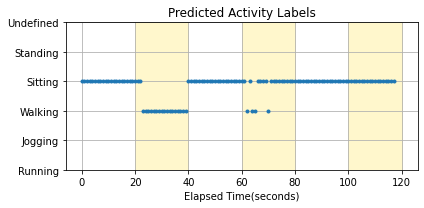

In [ ]:
#@title Flag Suspicious Labels
info = widgets.Label('Flag Suspicious Labels')
display(info)

def clicked(arg):
    # retrieve user input for confidence threshold
    conf_thresh = on_button_clicked(button)
    flag_sus_labels(np_labeling, np_labeling.mapping,labelList, testModel.model, conf_thresh)
button_download = widgets.Button(description = 'Flag Time-Series')   
button_download.on_click(clicked)
display(button_download)
print(dfA)